In [240]:
import pandas as pd
import numpy as np
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split, KFold
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

from tqdm import tqdm

<Axes: ylabel='Frequency'>

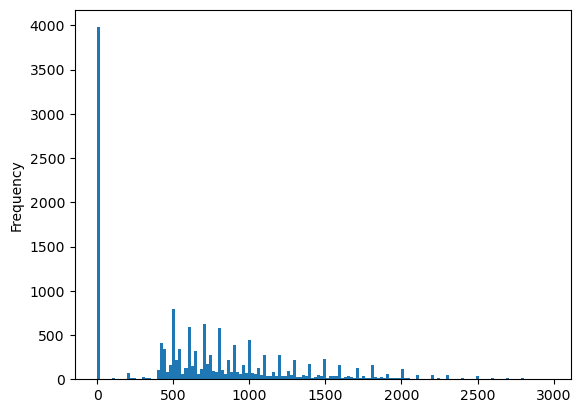

In [237]:
train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
train = train[train['Age'] > 14]
train = train[train['Employment_Status'] != 'Not Working']
train = train[train['Industry_Status'] != 'Not in universe or children']
train[train['Income'] < 3000]['Income'].plot.hist(bins=150)

In [266]:
train

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,41,M,High graduate,Full-Time,52,Retail,Sales,White,All other,Separated,...,Native,US,US,US,Single,0,0,0,Under Median,900
19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,Single,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,Single,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,Single,...,Native,US,US,US,Single,0,0,0,Unknown,999


Children or Armed Forces         656
Full-Time                        619
Choice Part-Time                  52
Part-Time (Usually Part-Time)     14
Part-Time (Usually Full-Time)      6
Seeking Part-Time                  5
Seeking Full-Time                  3
Name: Employment_Status, dtype: int64

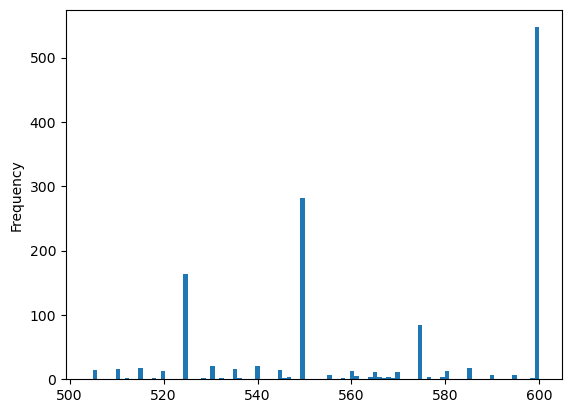

In [286]:
s = 500
e = s + 100
train[(train['Income'] > s) & (train['Income'] <= e)]['Income'].plot.hist(bins=100)
train[(train['Income'] > s) & (train['Income'] <= e)]['Employment_Status'].value_counts()

In [284]:
s = 2000
e = s + 100
train[(train['Income'] > s) & (train['Income'] <= e)].loc[:,['Age','Income']].mean()

Age         38.263158
Income    2076.578947
dtype: float64

In [6]:
# train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
# test = pd.read_csv('./open/test.csv').drop('ID',axis=1)

# for column in tqdm(train.columns):
#     if train[column].dtype == 'object' and train[column].nunique() <= 4:  # 가짓수가 4 이상인 경우
#         encoded = pd.get_dummies(train[column], prefix=column)
#         train = pd.concat([train.drop(column, axis=1), encoded], axis=1)

# train

100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 162.50it/s]


,Age,Gender,Working_Week (Yearly),Gains,Losses,Dividends,Income_Status,Income,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),...,Birth_Country (Mother)_US,Birth_Country (Mother)_Unknown,Birth_Country (Mother)_Vietnam,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single
0,63,M,4,0,0,0,Unknown,425,0,0,...,1,0,0,0,0,0,0,0,1,0
1,37,M,52,0,0,0,Under Median,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,58,F,52,3411,0,0,Under Median,860,0,0,...,1,0,0,0,0,0,1,0,0,0
3,44,M,52,0,0,0,Under Median,850,0,0,...,1,0,0,0,0,0,0,0,0,1
4,37,F,52,0,0,0,Unknown,570,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,33,M,52,0,0,0,Under Median,1300,0,0,...,1,0,0,0,0,0,0,0,0,1
19996,20,F,12,0,0,0,Under Median,850,0,0,...,0,0,0,0,0,0,0,0,1,0
19997,22,M,52,0,0,0,Unknown,999,0,0,...,1,0,0,0,0,0,0,0,0,1
19998,76,F,0,0,0,0,Under Median,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [382]:
from pycaret.regression import *

train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

# object_columns = train.select_dtypes(include=['object']).columns
# for i in object_columns:
#     train[i] = train[i].astype('category')
#     test[i] = test[i].astype('category')

data = train[(train['Age'] > 15) & (train['Income'] < 3000) & (train['Income'] > 0)]
data = data.drop('ID',axis=1)
# PyCaret 회귀 모델 설정
regression_setup = setup(data, target='Income',
                         max_encoding_ohe=2,
                         train_size=0.8,
                         fold=10,
                         session_id=42)

# 다양한 회귀 모델 비교
best_model = compare_models(n_select=3, sort='RMSE')

,Description,Value
0,Session id,42
1,Target,Income
2,Target type,Regression
3,Original data shape,"(11145, 22)"
4,Transformed data shape,"(11145, 22)"
5,Transformed train set shape,"(8916, 22)"
6,Transformed test set shape,"(2229, 22)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,16


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,245.3501,116540.8445,341.1393,0.4830,0.3453,0.3015,0.1380
gbr,Gradient Boosting Regressor,247.8585,116648.9367,341.2743,0.4825,0.3484,0.3070,0.3120
catboost,CatBoost Regressor,246.1275,117163.0712,342.0395,0.4803,0.3463,0.3018,1.1970
rf,Random Forest Regressor,255.7584,124433.9414,352.4927,0.4478,0.3581,0.3171,0.7710
xgboost,Extreme Gradient Boosting,254.6904,124953.4822,353.2407,0.4457,0.3581,0.3118,0.3330
lr,Linear Regression,269.2051,128653.5888,358.3658,0.4295,0.3818,0.3395,0.6470
ridge,Ridge Regression,269.2051,128653.6226,358.3658,0.4295,0.3818,0.3395,0.1050
lasso,Lasso Regression,269.2111,128660.6103,358.3749,0.4295,0.3816,0.3395,0.1070
llar,Lasso Least Angle Regression,269.2111,128660.6274,358.3749,0.4295,0.3816,0.3395,0.0990
lar,Least Angle Regression,269.2638,128685.2041,358.4103,0.4294,0.3820,0.3396,0.1000


In [127]:
train.columns

Index(['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [ ]:
# feaature engineering

In [191]:
train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
test = pd.read_csv('./open/test.csv')
test = test.fillna('Householder')

train['Working_Week (Yearly)'] = train['Working_Week (Yearly)'].astype('int32')
test['Working_Week (Yearly)'] = test['Working_Week (Yearly)'].astype('int32')
train = train.drop(['Household_Summary', 'Losses', 'Race', 'Citizenship'],axis=1)
test = test.drop(['Household_Summary', 'Losses', 'Race', 'Citizenship'],axis=1)
object_columns = train.select_dtypes(include=['object']).columns

for i in object_columns:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

data = train[(train['Age'] > 15) & (train['Income'] < 3000) & (train['Employment_Status'] != 'Not Working') & ((train['Industry_Status'] != 'Not in universe or children'))]
X = data.drop('Income',axis=1)
y = data[['Income']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

def objective(trial):
    # 하이퍼파라미터 검색 범위 지정
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }
    
    # 교차 검증 설정 (5-Fold 교차 검증 사용)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    rmse_scores = []

    for train_index, valid_index in kf.split(X):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[valid_index]

        # LightGBM 모델 정의
        model = lgb.LGBMRegressor(**params)

        # 모델 훈련
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

        # 검증 데이터로 RMSE 계산
        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmse_scores.append(rmse)

    # 교차 검증 평균 RMSE 반환
    return np.mean(rmse_scores)

# Optuna 최적화 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-03-21 21:24:41,565] A new study created in memory with name: no-name-3b421298-0397-47e9-9c67-fd1f04dff89c
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7376790418161371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7376790418161371
[LightGBM] [Warning] bagging_fraction is set=0.684746516525194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.684746516525194
[LightGBM] [Warning] lambda_l1 is set=0.0001305164874457583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001305164874457583
[LightGBM] [Warning] lambda_l2 is set=0.2151079542994167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2151079542994167
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:24:53,502] Trial 0 finished with value: 584.7593804953019 and parameters: {'lambda_l1': 0.0001305164874457583, 'lambda_l2': 0.2151079542994167, 'num_leaves': 48, 'learning_rate': 1.696149898615012e-05, 'feature_fraction': 0.7376790418161371, 'bagging_fraction': 0.684746516525194, 'bagging_freq': 3, 'min_child_samples': 45}. Best is trial 0 with value: 584.7593804953019.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7077414612801414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7077414612801414
[LightGBM] [Warning] bagging_fraction is set=0.6215272263506421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215272263506421
[LightGBM] [Warning] lambda_l1 is set=1.302632347518535e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.302632347518535e-06
[LightGBM] [Warning] lambda_l2 is set=1.4843381687921197e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4843381687921197e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2024-03-21 21:25:27,694] Trial 1 finished with value: 583.3701000192771 and parameters: {'lambda_l1': 1.302632347518535e-06, 'lambda_l2': 1.4843381687921197e-05, 'num_leaves': 215, 'learning_rate': 0.00017821944568274445, 'feature_fraction': 0.7077414612801414, 'bagging_fraction': 0.6215272263506421, 'bagging_freq': 7, 'min_child_samples': 10}. Best is trial 1 with value: 583.3701000192771.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) in

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8695271283922756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695271283922756
[LightGBM] [Warning] bagging_fraction is set=0.5391658182157653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5391658182157653
[LightGBM] [Warning] lambda_l1 is set=1.142044057617485e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.142044057617485e-07
[LightGBM] [Warning] lambda_l2 is set=0.032929624018625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.032929624018625
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:25:35,189] Trial 2 finished with value: 584.9080176511586 and parameters: {'lambda_l1': 1.142044057617485e-07, 'lambda_l2': 0.032929624018625, 'num_leaves': 30, 'learning_rate': 1.5895758613168068e-08, 'feature_fraction': 0.8695271283922756, 'bagging_fraction': 0.5391658182157653, 'bagging_freq': 4, 'min_child_samples': 65}. Best is trial 1 with value: 583.3701000192771.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9493997800218382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9493997800218382
[LightGBM] [Warning] bagging_fraction is set=0.8029089969292856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8029089969292856
[LightGBM] [Warning] lambda_l1 is set=1.3844072168048614e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3844072168048614e-07
[LightGBM] [Warning] lambda_l2 is set=2.399694203930922e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.399694203930922e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2024-03-21 21:25:47,539] Trial 3 finished with value: 584.9079970679328 and parameters: {'lambda_l1': 1.3844072168048614e-07, 'lambda_l2': 2.399694203930922e-07, 'num_leaves': 185, 'learning_rate': 1.6427963638877345e-08, 'feature_fraction': 0.9493997800218382, 'bagging_fraction': 0.8029089969292856, 'bagging_freq': 7, 'min_child_samples': 51}. Best is trial 1 with value: 583.3701000192771.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) in

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.42261977535047435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42261977535047435
[LightGBM] [Warning] bagging_fraction is set=0.6292299618889824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6292299618889824
[LightGBM] [Warning] lambda_l1 is set=1.282779123241164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.282779123241164
[LightGBM] [Warning] lambda_l2 is set=0.01105202593907695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01105202593907695
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:25:52,309] Trial 4 finished with value: 537.2006929872585 and parameters: {'lambda_l1': 1.282779123241164, 'lambda_l2': 0.01105202593907695, 'num_leaves': 120, 'learning_rate': 0.8291859587228018, 'feature_fraction': 0.42261977535047435, 'bagging_fraction': 0.6292299618889824, 'bagging_freq': 3, 'min_child_samples': 61}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  '

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.503571200093963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.503571200093963
[LightGBM] [Warning] bagging_fraction is set=0.44946259096301766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44946259096301766
[LightGBM] [Warning] lambda_l1 is set=0.00021313663604784997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021313663604784997
[LightGBM] [Warning] lambda_l2 is set=8.754458053514323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.754458053514323e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:25:55,967] Trial 5 finished with value: 584.8517378319908 and parameters: {'lambda_l1': 0.00021313663604784997, 'lambda_l2': 8.754458053514323e-07, 'num_leaves': 252, 'learning_rate': 8.324001576188822e-06, 'feature_fraction': 0.503571200093963, 'bagging_fraction': 0.44946259096301766, 'bagging_freq': 1, 'min_child_samples': 86}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7211888174378143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7211888174378143
[LightGBM] [Warning] bagging_fraction is set=0.5949562901444757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949562901444757
[LightGBM] [Warning] lambda_l1 is set=6.30976224834375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.30976224834375
[LightGBM] [Warning] lambda_l2 is set=0.01165433982106891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01165433982106891
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:26:00,010] Trial 6 finished with value: 584.9059815135486 and parameters: {'lambda_l1': 6.30976224834375, 'lambda_l2': 0.01165433982106891, 'num_leaves': 51, 'learning_rate': 2.604463284817407e-07, 'feature_fraction': 0.7211888174378143, 'bagging_fraction': 0.5949562901444757, 'bagging_freq': 1, 'min_child_samples': 70}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  '

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7831175221600342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7831175221600342
[LightGBM] [Warning] bagging_fraction is set=0.8203123623397475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8203123623397475
[LightGBM] [Warning] lambda_l1 is set=1.330267137487826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.330267137487826e-05
[LightGBM] [Warning] lambda_l2 is set=1.713532872358364e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713532872358364e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:26:04,695] Trial 7 finished with value: 584.899908641957 and parameters: {'lambda_l1': 1.330267137487826e-05, 'lambda_l2': 1.713532872358364e-05, 'num_leaves': 239, 'learning_rate': 9.266269454981606e-07, 'feature_fraction': 0.7831175221600342, 'bagging_fraction': 0.8203123623397475, 'bagging_freq': 3, 'min_child_samples': 86}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5896195763392128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5896195763392128
[LightGBM] [Warning] bagging_fraction is set=0.9852315488601144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9852315488601144
[LightGBM] [Warning] lambda_l1 is set=1.9757156795959463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9757156795959463e-06
[LightGBM] [Warning] lambda_l2 is set=1.0588789565698957e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0588789565698957e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:26:10,296] Trial 8 finished with value: 549.9278371991138 and parameters: {'lambda_l1': 1.9757156795959463e-06, 'lambda_l2': 1.0588789565698957e-06, 'num_leaves': 240, 'learning_rate': 0.006439384024103751, 'feature_fraction': 0.5896195763392128, 'bagging_fraction': 0.9852315488601144, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6603785890996545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6603785890996545
[LightGBM] [Warning] bagging_fraction is set=0.7257751949903092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7257751949903092
[LightGBM] [Warning] lambda_l1 is set=6.65354749610855e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.65354749610855e-08
[LightGBM] [Warning] lambda_l2 is set=7.088539597035988e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.088539597035988e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:26:14,062] Trial 9 finished with value: 584.9078247945091 and parameters: {'lambda_l1': 6.65354749610855e-08, 'lambda_l2': 7.088539597035988e-05, 'num_leaves': 91, 'learning_rate': 4.103260982342925e-08, 'feature_fraction': 0.6603785890996545, 'bagging_fraction': 0.7257751949903092, 'bagging_freq': 1, 'min_child_samples': 88}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.40149752213478423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40149752213478423
[LightGBM] [Warning] bagging_fraction is set=0.4072595288633345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4072595288633345
[LightGBM] [Warning] lambda_l1 is set=0.3782212606217836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3782212606217836
[LightGBM] [Warning] lambda_l2 is set=0.0015226940369825854, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015226940369825854
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-03-21 21:26:18,726] Trial 10 finished with value: 543.629893183372 and parameters: {'lambda_l1': 0.3782212606217836, 'lambda_l2': 0.0015226940369825854, 'num_leaves': 144, 'learning_rate': 0.7723853612914154, 'feature_fraction': 0.40149752213478423, 'bagging_fraction': 0.4072595288633345, 'bagging_freq': 5, 'min_child_samples': 25}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4097973489278716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4097973489278716
[LightGBM] [Warning] bagging_fraction is set=0.4004385259210945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4004385259210945
[LightGBM] [Warning] lambda_l1 is set=0.41344819420273443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41344819420273443
[LightGBM] [Warning] lambda_l2 is set=0.0015875033452368754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015875033452368754
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-03-21 21:26:23,199] Trial 11 finished with value: 542.1366555114616 and parameters: {'lambda_l1': 0.41344819420273443, 'lambda_l2': 0.0015875033452368754, 'num_leaves': 139, 'learning_rate': 0.7133408957430197, 'feature_fraction': 0.4097973489278716, 'bagging_fraction': 0.4004385259210945, 'bagging_freq': 5, 'min_child_samples': 27}. Best is trial 4 with value: 537.2006929872585.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4033153223912876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4033153223912876
[LightGBM] [Warning] bagging_fraction is set=0.493731931139785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.493731931139785
[LightGBM] [Warning] lambda_l1 is set=0.032068836125493556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.032068836125493556
[LightGBM] [Warning] lambda_l2 is set=8.186298783187246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.186298783187246
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-03-21 21:26:27,766] Trial 12 finished with value: 529.632098710714 and parameters: {'lambda_l1': 0.032068836125493556, 'lambda_l2': 8.186298783187246, 'num_leaves': 127, 'learning_rate': 0.3276154489247954, 'feature_fraction': 0.4033153223912876, 'bagging_fraction': 0.493731931139785, 'bagging_freq': 5, 'min_child_samples': 34}. Best is trial 12 with value: 529.632098710714.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5166005304063234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5166005304063234
[LightGBM] [Warning] bagging_fraction is set=0.5152549022352461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5152549022352461
[LightGBM] [Warning] lambda_l1 is set=0.01257974843419205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01257974843419205
[LightGBM] [Warning] lambda_l2 is set=5.794074996770559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794074996770559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-03-21 21:26:32,669] Trial 13 finished with value: 529.6220011702904 and parameters: {'lambda_l1': 0.01257974843419205, 'lambda_l2': 5.794074996770559, 'num_leaves': 93, 'learning_rate': 0.022765620159088226, 'feature_fraction': 0.5166005304063234, 'bagging_fraction': 0.5152549022352461, 'bagging_freq': 5, 'min_child_samples': 37}. Best is trial 13 with value: 529.6220011702904.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
 

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5449037637876656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5449037637876656
[LightGBM] [Warning] bagging_fraction is set=0.5096431995629137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096431995629137
[LightGBM] [Warning] lambda_l1 is set=0.00822363241651105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00822363241651105
[LightGBM] [Warning] lambda_l2 is set=4.653478488647794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.653478488647794
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2024-03-21 21:26:35,744] Trial 14 finished with value: 534.5612741757794 and parameters: {'lambda_l1': 0.00822363241651105, 'lambda_l2': 4.653478488647794, 'num_leaves': 98, 'learning_rate': 0.016538262704687626, 'feature_fraction': 0.5449037637876656, 'bagging_fraction': 0.5096431995629137, 'bagging_freq': 6, 'min_child_samples': 37}. Best is trial 13 with value: 529.6220011702904.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
 

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.49764338647933626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49764338647933626
[LightGBM] [Warning] bagging_fraction is set=0.5015354283079188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015354283079188
[LightGBM] [Warning] lambda_l1 is set=0.015596484273287123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015596484273287123
[LightGBM] [Warning] lambda_l2 is set=4.270424156849049, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.270424156849049
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-03-21 21:26:40,164] Trial 15 finished with value: 536.0414600842915 and parameters: {'lambda_l1': 0.015596484273287123, 'lambda_l2': 4.270424156849049, 'num_leaves': 172, 'learning_rate': 0.01644099827690803, 'feature_fraction': 0.49764338647933626, 'bagging_fraction': 0.5015354283079188, 'bagging_freq': 5, 'min_child_samples': 7}. Best is trial 13 with value: 529.6220011702904.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6089372284057206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089372284057206
[LightGBM] [Warning] bagging_fraction is set=0.5553015634459961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553015634459961
[LightGBM] [Warning] lambda_l1 is set=0.012801705555497124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012801705555497124
[LightGBM] [Warning] lambda_l2 is set=0.36362175581898737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36362175581898737
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2024-03-21 21:26:43,505] Trial 16 finished with value: 578.2290816944953 and parameters: {'lambda_l1': 0.012801705555497124, 'lambda_l2': 0.36362175581898737, 'num_leaves': 81, 'learning_rate': 0.0009182261995811157, 'feature_fraction': 0.6089372284057206, 'bagging_fraction': 0.5553015634459961, 'bagging_freq': 6, 'min_child_samples': 26}. Best is trial 13 with value: 529.6220011702904.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.48235143414247444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48235143414247444
[LightGBM] [Warning] bagging_fraction is set=0.47310463613845566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47310463613845566
[LightGBM] [Warning] lambda_l1 is set=0.0024322017969614935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024322017969614935
[LightGBM] [Warning] lambda_l2 is set=6.944573277591137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.944573277591137
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:26:46,338] Trial 17 finished with value: 524.4008104894447 and parameters: {'lambda_l1': 0.0024322017969614935, 'lambda_l2': 6.944573277591137, 'num_leaves': 166, 'learning_rate': 0.08242259362810161, 'feature_fraction': 0.48235143414247444, 'bagging_fraction': 0.47310463613845566, 'bagging_freq': 4, 'min_child_samples': 39}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4908486112627914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4908486112627914
[LightGBM] [Warning] bagging_fraction is set=0.7094469575264672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7094469575264672
[LightGBM] [Warning] lambda_l1 is set=0.001331826510991331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001331826510991331
[LightGBM] [Warning] lambda_l2 is set=0.41527738726038155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41527738726038155
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:26:51,071] Trial 18 finished with value: 525.2525217124455 and parameters: {'lambda_l1': 0.001331826510991331, 'lambda_l2': 0.41527738726038155, 'num_leaves': 179, 'learning_rate': 0.0660389754303923, 'feature_fraction': 0.4908486112627914, 'bagging_fraction': 0.7094469575264672, 'bagging_freq': 4, 'min_child_samples': 17}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6289543994816141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289543994816141
[LightGBM] [Warning] bagging_fraction is set=0.8192703301373346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8192703301373346
[LightGBM] [Warning] lambda_l1 is set=0.0014122268474485425, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014122268474485425
[LightGBM] [Warning] lambda_l2 is set=0.33127123930258745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33127123930258745
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:26:56,826] Trial 19 finished with value: 527.1300362804 and parameters: {'lambda_l1': 0.0014122268474485425, 'lambda_l2': 0.33127123930258745, 'num_leaves': 182, 'learning_rate': 0.09574788413456355, 'feature_fraction': 0.6289543994816141, 'bagging_fraction': 0.8192703301373346, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4762130262284066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762130262284066
[LightGBM] [Warning] bagging_fraction is set=0.9187296587566448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9187296587566448
[LightGBM] [Warning] lambda_l1 is set=4.177292268939121e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.177292268939121e-05
[LightGBM] [Warning] lambda_l2 is set=0.11454564636153994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11454564636153994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:27:02,516] Trial 20 finished with value: 576.7201942080895 and parameters: {'lambda_l1': 4.177292268939121e-05, 'lambda_l2': 0.11454564636153994, 'num_leaves': 206, 'learning_rate': 0.0012394963626022662, 'feature_fraction': 0.4762130262284066, 'bagging_fraction': 0.9187296587566448, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6129073815830087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129073815830087
[LightGBM] [Warning] bagging_fraction is set=0.7810021997341825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7810021997341825
[LightGBM] [Warning] lambda_l1 is set=0.0015019507057378915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015019507057378915
[LightGBM] [Warning] lambda_l2 is set=1.423942564255116e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.423942564255116e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:27:07,841] Trial 21 finished with value: 525.5674385030421 and parameters: {'lambda_l1': 0.0015019507057378915, 'lambda_l2': 1.423942564255116e-08, 'num_leaves': 169, 'learning_rate': 0.07993545850275492, 'feature_fraction': 0.6129073815830087, 'bagging_fraction': 0.7810021997341825, 'bagging_freq': 4, 'min_child_samples': 15}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5581336895944836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581336895944836
[LightGBM] [Warning] bagging_fraction is set=0.7415814046880622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7415814046880622
[LightGBM] [Warning] lambda_l1 is set=0.001130647806812283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001130647806812283
[LightGBM] [Warning] lambda_l2 is set=1.3497641870459153e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3497641870459153e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:27:12,710] Trial 22 finished with value: 524.987276415014 and parameters: {'lambda_l1': 0.001130647806812283, 'lambda_l2': 1.3497641870459153e-08, 'num_leaves': 155, 'learning_rate': 0.0957656553160008, 'feature_fraction': 0.5581336895944836, 'bagging_fraction': 0.7415814046880622, 'bagging_freq': 4, 'min_child_samples': 19}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5657987355829068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5657987355829068
[LightGBM] [Warning] bagging_fraction is set=0.742792416452133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742792416452133
[LightGBM] [Warning] lambda_l1 is set=0.0010322291285501735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010322291285501735
[LightGBM] [Warning] lambda_l2 is set=1.0357826912468843e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0357826912468843e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-03-21 21:27:17,646] Trial 23 finished with value: 569.7131132457985 and parameters: {'lambda_l1': 0.0010322291285501735, 'lambda_l2': 1.0357826912468843e-08, 'num_leaves': 153, 'learning_rate': 0.0021946011635897334, 'feature_fraction': 0.5657987355829068, 'bagging_fraction': 0.742792416452133, 'bagging_freq': 4, 'min_child_samples': 21}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) in

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4808017374056015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4808017374056015
[LightGBM] [Warning] bagging_fraction is set=0.6790907036591372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6790907036591372
[LightGBM] [Warning] lambda_l1 is set=0.07798899775199557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07798899775199557
[LightGBM] [Warning] lambda_l2 is set=0.5935381378461501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5935381378461501
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:21,204] Trial 24 finished with value: 525.1440052567198 and parameters: {'lambda_l1': 0.07798899775199557, 'lambda_l2': 0.5935381378461501, 'num_leaves': 207, 'learning_rate': 0.11966739451910492, 'feature_fraction': 0.4808017374056015, 'bagging_fraction': 0.6790907036591372, 'bagging_freq': 3, 'min_child_samples': 45}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.46601360884744786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46601360884744786
[LightGBM] [Warning] bagging_fraction is set=0.8967639897713224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8967639897713224
[LightGBM] [Warning] lambda_l1 is set=0.14895793041988145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14895793041988145
[LightGBM] [Warning] lambda_l2 is set=0.00027113125488916764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027113125488916764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:27:25,368] Trial 25 finished with value: 583.7350454979431 and parameters: {'lambda_l1': 0.14895793041988145, 'lambda_l2': 0.00027113125488916764, 'num_leaves': 209, 'learning_rate': 0.00016840020034586303, 'feature_fraction': 0.46601360884744786, 'bagging_fraction': 0.8967639897713224, 'bagging_freq': 2, 'min_child_samples': 50}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) i

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.5503698564551299, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503698564551299
[LightGBM] [Warning] bagging_fraction is set=0.6499791372251342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6499791372251342
[LightGBM] [Warning] lambda_l1 is set=0.07469828058865803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07469828058865803
[LightGBM] [Warning] lambda_l2 is set=1.176867190937639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.176867190937639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:27:29,300] Trial 26 finished with value: 525.8477544871294 and parameters: {'lambda_l1': 0.07469828058865803, 'lambda_l2': 1.176867190937639, 'num_leaves': 199, 'learning_rate': 0.17485787540074088, 'feature_fraction': 0.5503698564551299, 'bagging_fraction': 0.6499791372251342, 'bagging_freq': 2, 'min_child_samples': 42}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
 

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.4521572313719847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4521572313719847
[LightGBM] [Warning] bagging_fraction is set=0.8603746374774369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8603746374774369
[LightGBM] [Warning] lambda_l1 is set=7.120663923641007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.120663923641007
[LightGBM] [Warning] lambda_l2 is set=0.03934548806353687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03934548806353687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:33,471] Trial 27 finished with value: 565.4389009007425 and parameters: {'lambda_l1': 7.120663923641007, 'lambda_l2': 0.03934548806353687, 'num_leaves': 158, 'learning_rate': 0.0033438579394844507, 'feature_fraction': 0.4521572313719847, 'bagging_fraction': 0.8603746374774369, 'bagging_freq': 3, 'min_child_samples': 45}. Best is trial 17 with value: 524.4008104894447.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6702105795922487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702105795922487
[LightGBM] [Warning] bagging_fraction is set=0.6736587947933708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736587947933708
[LightGBM] [Warning] lambda_l1 is set=0.003428709180164653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003428709180164653
[LightGBM] [Warning] lambda_l2 is set=1.0900489659542481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0900489659542481e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:37,274] Trial 28 finished with value: 524.0317604257989 and parameters: {'lambda_l1': 0.003428709180164653, 'lambda_l2': 1.0900489659542481e-07, 'num_leaves': 228, 'learning_rate': 0.029174816771565658, 'feature_fraction': 0.6702105795922487, 'bagging_fraction': 0.6736587947933708, 'bagging_freq': 3, 'min_child_samples': 76}. Best is trial 28 with value: 524.0317604257989.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7885150484576169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7885150484576169
[LightGBM] [Warning] bagging_fraction is set=0.7550306384678402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7550306384678402
[LightGBM] [Warning] lambda_l1 is set=5.7093462731893266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7093462731893266e-05
[LightGBM] [Warning] lambda_l2 is set=7.200950085486845e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.200950085486845e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:27:40,663] Trial 29 finished with value: 584.8183646028372 and parameters: {'lambda_l1': 5.7093462731893266e-05, 'lambda_l2': 7.200950085486845e-08, 'num_leaves': 227, 'learning_rate': 1.0102690978768765e-05, 'feature_fraction': 0.7885150484576169, 'bagging_fraction': 0.7550306384678402, 'bagging_freq': 2, 'min_child_samples': 75}. Best is trial 28 with value: 524.0317604257989.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) 

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6604602507793061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6604602507793061
[LightGBM] [Warning] bagging_fraction is set=0.5752545177256887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752545177256887
[LightGBM] [Warning] lambda_l1 is set=0.00048279198314504204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048279198314504204
[LightGBM] [Warning] lambda_l2 is set=5.953451954181855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.953451954181855e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:43,521] Trial 30 finished with value: 580.2428156793179 and parameters: {'lambda_l1': 0.00048279198314504204, 'lambda_l2': 5.953451954181855e-08, 'num_leaves': 124, 'learning_rate': 0.0006044707682101899, 'feature_fraction': 0.6604602507793061, 'bagging_fraction': 0.5752545177256887, 'bagging_freq': 3, 'min_child_samples': 78}. Best is trial 28 with value: 524.0317604257989.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) i

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6540336741484777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540336741484777
[LightGBM] [Warning] bagging_fraction is set=0.6744124407096388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744124407096388
[LightGBM] [Warning] lambda_l1 is set=0.004222904737695153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004222904737695153
[LightGBM] [Warning] lambda_l2 is set=2.1276443470810875e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1276443470810875e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:46,584] Trial 31 finished with value: 522.569219058866 and parameters: {'lambda_l1': 0.004222904737695153, 'lambda_l2': 2.1276443470810875e-06, 'num_leaves': 193, 'learning_rate': 0.055811595730609585, 'feature_fraction': 0.6540336741484777, 'bagging_fraction': 0.6744124407096388, 'bagging_freq': 3, 'min_child_samples': 97}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6717899510163186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717899510163186
[LightGBM] [Warning] bagging_fraction is set=0.6691143449714466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691143449714466
[LightGBM] [Warning] lambda_l1 is set=0.003946978044887915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003946978044887915
[LightGBM] [Warning] lambda_l2 is set=3.128920582574004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.128920582574004e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:49,627] Trial 32 finished with value: 523.7223737177449 and parameters: {'lambda_l1': 0.003946978044887915, 'lambda_l2': 3.128920582574004e-06, 'num_leaves': 193, 'learning_rate': 0.03201009578147871, 'feature_fraction': 0.6717899510163186, 'bagging_fraction': 0.6691143449714466, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7726998683830235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726998683830235
[LightGBM] [Warning] bagging_fraction is set=0.675474083212674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675474083212674
[LightGBM] [Warning] lambda_l1 is set=0.0037204789474597332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037204789474597332
[LightGBM] [Warning] lambda_l2 is set=2.0949173774730064e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0949173774730064e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:27:52,487] Trial 33 finished with value: 584.610938464355 and parameters: {'lambda_l1': 0.0037204789474597332, 'lambda_l2': 2.0949173774730064e-06, 'num_leaves': 225, 'learning_rate': 3.445699094873422e-05, 'feature_fraction': 0.7726998683830235, 'bagging_fraction': 0.675474083212674, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6774285658623611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774285658623611
[LightGBM] [Warning] bagging_fraction is set=0.6142170114392738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142170114392738
[LightGBM] [Warning] lambda_l1 is set=0.004433712952841291, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004433712952841291
[LightGBM] [Warning] lambda_l2 is set=6.091066565402789e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091066565402789e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:27:55,352] Trial 34 finished with value: 524.3751405125709 and parameters: {'lambda_l1': 0.004433712952841291, 'lambda_l2': 6.091066565402789e-06, 'num_leaves': 191, 'learning_rate': 0.02962264425208807, 'feature_fraction': 0.6774285658623611, 'bagging_fraction': 0.6142170114392738, 'bagging_freq': 2, 'min_child_samples': 98}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.6853843663488274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6853843663488274
[LightGBM] [Warning] bagging_fraction is set=0.6301672947973751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6301672947973751
[LightGBM] [Warning] lambda_l1 is set=0.00020287175925340418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020287175925340418
[LightGBM] [Warning] lambda_l2 is set=4.851879087919151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.851879087919151e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:27:58,161] Trial 35 finished with value: 538.605075566969 and parameters: {'lambda_l1': 0.00020287175925340418, 'lambda_l2': 4.851879087919151e-06, 'num_leaves': 190, 'learning_rate': 0.010480928386597891, 'feature_fraction': 0.6853843663488274, 'bagging_fraction': 0.6301672947973751, 'bagging_freq': 2, 'min_child_samples': 100}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7458306936694894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7458306936694894
[LightGBM] [Warning] bagging_fraction is set=0.6094592232068351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6094592232068351
[LightGBM] [Warning] lambda_l1 is set=0.0050071688191787546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0050071688191787546
[LightGBM] [Warning] lambda_l2 is set=1.4927268224423347e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4927268224423347e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:28:01,107] Trial 36 finished with value: 523.3579864089941 and parameters: {'lambda_l1': 0.0050071688191787546, 'lambda_l2': 1.4927268224423347e-05, 'num_leaves': 255, 'learning_rate': 0.03294646025500721, 'feature_fraction': 0.7458306936694894, 'bagging_fraction': 0.6094592232068351, 'bagging_freq': 2, 'min_child_samples': 93}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8561687689079218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8561687689079218
[LightGBM] [Warning] bagging_fraction is set=0.6579609666584745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6579609666584745
[LightGBM] [Warning] lambda_l1 is set=8.437699192194379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.437699192194379e-06
[LightGBM] [Warning] lambda_l2 is set=2.9119647336932895e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9119647336932895e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:28:04,162] Trial 37 finished with value: 548.2388266512821 and parameters: {'lambda_l1': 8.437699192194379e-06, 'lambda_l2': 2.9119647336932895e-07, 'num_leaves': 245, 'learning_rate': 0.006177377489594715, 'feature_fraction': 0.8561687689079218, 'bagging_fraction': 0.6579609666584745, 'bagging_freq': 2, 'min_child_samples': 93}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7436827804417668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7436827804417668
[LightGBM] [Warning] bagging_fraction is set=0.7042152836520625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7042152836520625
[LightGBM] [Warning] lambda_l1 is set=0.00037077565718939405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037077565718939405
[LightGBM] [Warning] lambda_l2 is set=3.1437334586717386e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437334586717386e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:07,564] Trial 38 finished with value: 527.1091931615265 and parameters: {'lambda_l1': 0.00037077565718939405, 'lambda_l2': 3.1437334586717386e-05, 'num_leaves': 255, 'learning_rate': 0.30780295930572266, 'feature_fraction': 0.7436827804417668, 'bagging_fraction': 0.7042152836520625, 'bagging_freq': 3, 'min_child_samples': 78}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8322824949063978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322824949063978
[LightGBM] [Warning] bagging_fraction is set=0.5941258025439483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5941258025439483
[LightGBM] [Warning] lambda_l1 is set=7.165059467605304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165059467605304e-05
[LightGBM] [Warning] lambda_l2 is set=3.361026962137696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361026962137696e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:10,470] Trial 39 finished with value: 522.6372936216455 and parameters: {'lambda_l1': 7.165059467605304e-05, 'lambda_l2': 3.361026962137696e-07, 'num_leaves': 227, 'learning_rate': 0.036300387174071226, 'feature_fraction': 0.8322824949063978, 'bagging_fraction': 0.5941258025439483, 'bagging_freq': 3, 'min_child_samples': 92}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.834922884835397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834922884835397
[LightGBM] [Warning] bagging_fraction is set=0.6078893573520519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6078893573520519
[LightGBM] [Warning] lambda_l1 is set=7.295732593556515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.295732593556515e-07
[LightGBM] [Warning] lambda_l2 is set=4.409321519651327e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.409321519651327e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:28:13,157] Trial 40 finished with value: 584.8850494253509 and parameters: {'lambda_l1': 7.295732593556515e-07, 'lambda_l2': 4.409321519651327e-07, 'num_leaves': 221, 'learning_rate': 2.6286375133889064e-06, 'feature_fraction': 0.834922884835397, 'bagging_fraction': 0.6078893573520519, 'bagging_freq': 1, 'min_child_samples': 91}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9459840698377285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459840698377285
[LightGBM] [Warning] bagging_fraction is set=0.5426806961669787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5426806961669787
[LightGBM] [Warning] lambda_l1 is set=6.588234832459592e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.588234832459592e-05
[LightGBM] [Warning] lambda_l2 is set=1.395366112766118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.395366112766118e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:16,076] Trial 41 finished with value: 523.828501454088 and parameters: {'lambda_l1': 6.588234832459592e-05, 'lambda_l2': 1.395366112766118e-07, 'num_leaves': 234, 'learning_rate': 0.035103698482254315, 'feature_fraction': 0.9459840698377285, 'bagging_fraction': 0.5426806961669787, 'bagging_freq': 3, 'min_child_samples': 83}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9002479283440933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002479283440933
[LightGBM] [Warning] bagging_fraction is set=0.5476655049375371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5476655049375371
[LightGBM] [Warning] lambda_l1 is set=3.994283895725025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.994283895725025e-05
[LightGBM] [Warning] lambda_l2 is set=2.42404555269375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.42404555269375e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:18,835] Trial 42 finished with value: 560.273094275529 and parameters: {'lambda_l1': 3.994283895725025e-05, 'lambda_l2': 2.42404555269375e-06, 'num_leaves': 236, 'learning_rate': 0.0035190196934189203, 'feature_fraction': 0.9002479283440933, 'bagging_fraction': 0.5476655049375371, 'bagging_freq': 3, 'min_child_samples': 83}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9915160394383327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915160394383327
[LightGBM] [Warning] bagging_fraction is set=0.5827360355169694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827360355169694
[LightGBM] [Warning] lambda_l1 is set=7.032018548983484e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.032018548983484e-06
[LightGBM] [Warning] lambda_l2 is set=6.84082321503532e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.84082321503532e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:21,591] Trial 43 finished with value: 580.4347658989795 and parameters: {'lambda_l1': 7.032018548983484e-06, 'lambda_l2': 6.84082321503532e-05, 'num_leaves': 256, 'learning_rate': 0.00048812950623258646, 'feature_fraction': 0.9915160394383327, 'bagging_fraction': 0.5827360355169694, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [Warning] lambda_l1 is set=9.14557085778129e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.14557085778129e-05
[LightGBM] [Warning] lambda_l2 is set=7.564103517096218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.564103517096218e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9045436795370656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045436795370656
[LightGBM] [Warning] bagging_fraction is set=0.6441071941376244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6441071941376244
[LightGBM] [W

C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.718116201205872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.718116201205872
[LightGBM] [Warning] bagging_fraction is set=0.5705416364491013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705416364491013
[LightGBM] [Warning] lambda_l1 is set=1.8875204178323263e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8875204178323263e-06
[LightGBM] [Warning] lambda_l2 is set=1.3031870627514948e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3031870627514948e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:27,612] Trial 45 finished with value: 523.291304358518 and parameters: {'lambda_l1': 1.8875204178323263e-06, 'lambda_l2': 1.3031870627514948e-05, 'num_leaves': 239, 'learning_rate': 0.03484796463716084, 'feature_fraction': 0.718116201205872, 'bagging_fraction': 0.5705416364491013, 'bagging_freq': 3, 'min_child_samples': 90}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7479770394521592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479770394521592
[LightGBM] [Warning] bagging_fraction is set=0.5721290900259304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721290900259304
[LightGBM] [Warning] lambda_l1 is set=2.739406257913643e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739406257913643e-08
[LightGBM] [Warning] lambda_l2 is set=9.702102942138554e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702102942138554e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-03-21 21:28:30,458] Trial 46 finished with value: 537.9381146898529 and parameters: {'lambda_l1': 2.739406257913643e-08, 'lambda_l2': 9.702102942138554e-06, 'num_leaves': 241, 'learning_rate': 0.010444719520840928, 'feature_fraction': 0.7479770394521592, 'bagging_fraction': 0.5721290900259304, 'bagging_freq': 2, 'min_child_samples': 90}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7159710169245249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159710169245249
[LightGBM] [Warning] bagging_fraction is set=0.6048420436585991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6048420436585991
[LightGBM] [Warning] lambda_l1 is set=6.207592645638142e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.207592645638142e-07
[LightGBM] [Warning] lambda_l2 is set=2.4333179866834323e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4333179866834323e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-03-21 21:28:33,703] Trial 47 finished with value: 531.7351730391159 and parameters: {'lambda_l1': 6.207592645638142e-07, 'lambda_l2': 2.4333179866834323e-05, 'num_leaves': 197, 'learning_rate': 0.5637306295484298, 'feature_fraction': 0.7159710169245249, 'bagging_fraction': 0.6048420436585991, 'bagging_freq': 3, 'min_child_samples': 68}. Best is trial 31 with value: 522.569219058866.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:28:36,511] Trial 48 finished with value: 522.4343216358864 and parameters: {'lambda_l1': 1.8120757116372935e-05, 'lambda_l2': 0.00024320416848605119, 'num_leaves': 216, 'learning_rate': 0.04663811234877687, 'feature_fraction': 0.7867944944504474, 'bagging_fraction': 0.6255721707830645, 'bagging_freq': 1, 'min_child_samples': 95}. Best is trial 48 with value: 522.4343216358864.
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1196361952.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) in

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\User\anaconda3\envs\project\lib\site-packages\lightgb

[LightGBM] [Warning] feature_fraction is set=0.8044659114450655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8044659114450655
[LightGBM] [Warning] bagging_fraction is set=0.5249354242687917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249354242687917
[LightGBM] [Warning] lambda_l1 is set=3.559108788572125e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.559108788572125e-06
[LightGBM] [Warning] lambda_l2 is set=0.00039275673263643743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00039275673263643743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-03-21 21:28:39,544] Trial 49 finished with value: 584.5007883578476 and parameters: {'lambda_l1': 3.559108788572125e-06, 'lambda_l2': 0.00039275673263643743, 'num_leaves': 247, 'learning_rate': 4.6174983732892856e-05, 'feature_fraction': 0.8044659114450655, 'bagging_fraction': 0.5249354242687917, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 48 with value: 522.4343216358864.


In [192]:
study.best_value

522.4343216358864

In [193]:
study.best_params

{'lambda_l1': 1.8120757116372935e-05,
 'lambda_l2': 0.00024320416848605119,
 'num_leaves': 216,
 'learning_rate': 0.04663811234877687,
 'feature_fraction': 0.7867944944504474,
 'bagging_fraction': 0.6255721707830645,
 'bagging_freq': 1,
 'min_child_samples': 95}

In [194]:
import lightgbm as lgb
import matplotlib.pyplot as plt
train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
test = pd.read_csv('./open/test.csv')
test = test.fillna('Householder')

train['Working_Week (Yearly)'] = train['Working_Week (Yearly)'].astype('int32')
test['Working_Week (Yearly)'] = test['Working_Week (Yearly)'].astype('int32')

object_columns = train.select_dtypes(include=['object']).columns

for i in object_columns:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')
    
data = train[(train['Age'] > 15) & (train['Income'] < 3000)]
X = data.drop('Income',axis=1)
y = data[['Income']]
    
# LightGBM 모델 훈련
lgb_model = lgb.LGBMRegressor(bagging_fraction=0.8205263711474302, bagging_freq=1,
              feature_fraction=0.8234703314292054,
              lambda_l1=0.02376856687184958, lambda_l2=1.2645848339107883e-08,
              learning_rate=0.03373139521340064, min_child_samples=39)
lgb_model = lgb.LGBMRegressor(**study.best_params)
lgb_model.fit(X, y)

# 피처 이름과 중요도를 담을 데이터프레임 생성
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = X.columns
feature_importance_df['importance'] = lgb_model.feature_importances_

# 중요도로 정렬
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# 결과 출력
print("Feature Importance:")
for idx, row in feature_importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']}")

[LightGBM] [Warning] feature_fraction is set=0.7867944944504474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7867944944504474
[LightGBM] [Warning] bagging_fraction is set=0.6255721707830645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255721707830645
[LightGBM] [Warning] lambda_l1 is set=1.8120757116372935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8120757116372935e-05
[LightGBM] [Warning] lambda_l2 is set=0.00024320416848605119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024320416848605119
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Feature Importance:
Age: 2147
Industry_Status: 1231
Occupation_Status: 917
Education_Status: 785
Working_Week (Yearly): 548
Household_Status: 417
Employment_Status: 342
Income_Status: 319
Gender: 294
Tax_Status: 203
Martial_Status: 163
Dividends: 155
Household_Summary: 144
Birth_Country (Mother): 122
Birth_

In [230]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV

# # LightGBM 모델 정의
# model = lgb.LGBMRegressor(bagging_fraction=0.8205263711474302, bagging_freq=1,
#               feature_fraction=0.8234703314292054,
#               lambda_l1=0.02376856687184958, lambda_l2=1.2645848339107883e-08,
#               learning_rate=0.03373139521340064)

# # 그리드 탐색을 위한 파라미터 그리드 설정
# param_grid = {
#     'min_child_samples': list(range(10,40,2))  # 변경할 min_child_samples 값들
# }

# # GridSearchCV를 사용하여 그리드 탐색 수행
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X, y)

# # 결과 출력
# print("Best params:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [W

In [337]:
train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
test = pd.read_csv('./open/test.csv')
test = test.fillna('Householder')

train['Working_Week (Yearly)'] = train['Working_Week (Yearly)'].astype('int32')
test['Working_Week (Yearly)'] = test['Working_Week (Yearly)'].astype('int32')
train = train.drop(['Household_Summary', 'Losses', 'Race', 'Citizenship'],axis=1)
test = test.drop(['Household_Summary', 'Losses', 'Race', 'Citizenship'],axis=1)
object_columns = train.select_dtypes(include=['object']).columns

for i in object_columns:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

# data = train[(train['Age'] > 15) & (train['Income'] < 3000) & (train['Employment_Status'] != 'Not Working') & ((train['Industry_Status'] != 'Not in universe or children'))]
# X = data.drop('Income',axis=1)
# y = data[['Income']]

data = train[(train['Age'] > 15) & (train['Income'] < 3000)]
X = data.drop('Income',axis=1)
y = data[['Income']]
lgb_model = lgb.LGBMRegressor(bagging_fraction=0.8205263711474302, bagging_freq=1,
              feature_fraction=0.8234703314292054,
              lambda_l1=0.02376856687184958, lambda_l2=1.2645848339107883e-08,
              learning_rate=0.03373139521340064, min_child_samples=39)

params = {'lambda_l1': 0.001961129273181537,
 'lambda_l2': 0.0003529349088970434,
 'num_leaves': 224,
 'learning_rate': 0.050922001997949315,
 'feature_fraction': 0.46873228379207216,
 'bagging_fraction': 0.9995050862444139,
 'bagging_freq': 5,
 'min_child_samples': 30}
lgb_model = lgb.LGBMRegressor(**params)


lgb_model.fit(X,y)

[LightGBM] [Warning] feature_fraction is set=0.8234703314292054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234703314292054
[LightGBM] [Warning] bagging_fraction is set=0.8205263711474302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205263711474302
[LightGBM] [Warning] lambda_l1 is set=0.02376856687184958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02376856687184958
[LightGBM] [Warning] lambda_l2 is set=1.2645848339107883e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2645848339107883e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMRegressor(bagging_fraction=0.8205263711474302, bagging_freq=1,
              feature_fraction=0.8234703314292054,
              lambda_l1=0.02376856687184958, lambda_l2=1.2645848339107883e-08,
              learning_rate=0.03373139521340064, min_child_samples=39)

In [317]:
train = pd.read_csv('./open/train.csv').drop('ID',axis=1)
test = pd.read_csv('./open/test.csv')
test = test.fillna('Householder')

train['Working_Week (Yearly)'] = train['Working_Week (Yearly)'].astype('int32')
test['Working_Week (Yearly)'] = test['Working_Week (Yearly)'].astype('int32')
train = train.drop(['Household_Summary', 'Losses', 'Race', 'Citizenship'],axis=1)
test = test.drop(['Household_Summary', 'Losses', 'Race', 'Citizenship'],axis=1)
object_columns = train.select_dtypes(include=['object']).columns

for i in object_columns:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

# data = train[(train['Age'] > 15) & (train['Income'] < 3000) & (train['Employment_Status'] != 'Not Working') & ((train['Industry_Status'] != 'Not in universe or children'))]
# X = data.drop('Income',axis=1)
# y = data[['Income']]

data = train[(train['Age'] > 15) & (train['Income'] < 3000)]
X = data.drop('Income',axis=1)
y = data[['Income']]

params = {'learning_rate':0.005746067154098378,
'depth':10,
'l2_leaf_reg':0.22009313587635276,
'random_strength':0.45687561571445706,
'bagging_temperature':0.6606541325502003,
'border_count':106,
'grow_policy':'SymmetricTree'}

import catboost
cat_model = catboost.CatBoostRegressor(**params,cat_features=list(object_columns))
cat_model.fit(X,y)

0:	learn: 591.7590514	total: 317ms	remaining: 5m 16s
1:	learn: 590.7699471	total: 530ms	remaining: 4m 24s
2:	learn: 589.8182087	total: 718ms	remaining: 3m 58s
3:	learn: 588.8602034	total: 901ms	remaining: 3m 44s
4:	learn: 587.9411623	total: 1.07s	remaining: 3m 34s
5:	learn: 587.0283776	total: 1.26s	remaining: 3m 29s
6:	learn: 586.0963956	total: 1.46s	remaining: 3m 26s
7:	learn: 585.1336877	total: 1.63s	remaining: 3m 22s
8:	learn: 584.2309750	total: 1.82s	remaining: 3m 20s
9:	learn: 583.3294582	total: 2s	remaining: 3m 17s
10:	learn: 582.4508886	total: 2.16s	remaining: 3m 14s
11:	learn: 581.5152906	total: 2.37s	remaining: 3m 14s
12:	learn: 580.6200229	total: 2.55s	remaining: 3m 13s
13:	learn: 579.7674667	total: 2.71s	remaining: 3m 11s
14:	learn: 578.8600018	total: 2.91s	remaining: 3m 10s
15:	learn: 577.9824933	total: 3.11s	remaining: 3m 11s
16:	learn: 577.1452237	total: 3.3s	remaining: 3m 10s
17:	learn: 576.2855150	total: 3.51s	remaining: 3m 11s
18:	learn: 575.4267076	total: 3.72s	remain

155:	learn: 507.5597698	total: 31.8s	remaining: 2m 51s
156:	learn: 507.2942496	total: 31.9s	remaining: 2m 51s
157:	learn: 506.9927202	total: 32.1s	remaining: 2m 51s
158:	learn: 506.7615594	total: 32.3s	remaining: 2m 51s
159:	learn: 506.4967800	total: 32.6s	remaining: 2m 50s
160:	learn: 506.2699706	total: 32.8s	remaining: 2m 50s
161:	learn: 506.0370664	total: 33s	remaining: 2m 50s
162:	learn: 505.7901645	total: 33.2s	remaining: 2m 50s
163:	learn: 505.5601984	total: 33.4s	remaining: 2m 50s
164:	learn: 505.3099761	total: 33.6s	remaining: 2m 50s
165:	learn: 505.0460295	total: 33.8s	remaining: 2m 50s
166:	learn: 504.7428460	total: 34s	remaining: 2m 49s
167:	learn: 504.4477631	total: 34.3s	remaining: 2m 49s
168:	learn: 504.2268718	total: 34.4s	remaining: 2m 49s
169:	learn: 503.9954404	total: 34.6s	remaining: 2m 48s
170:	learn: 503.7690257	total: 34.8s	remaining: 2m 48s
171:	learn: 503.5593891	total: 35s	remaining: 2m 48s
172:	learn: 503.3485970	total: 35.2s	remaining: 2m 48s
173:	learn: 503.

305:	learn: 481.9188652	total: 1m 4s	remaining: 2m 25s
306:	learn: 481.7964382	total: 1m 4s	remaining: 2m 25s
307:	learn: 481.6299200	total: 1m 4s	remaining: 2m 25s
308:	learn: 481.4944501	total: 1m 4s	remaining: 2m 24s
309:	learn: 481.3176983	total: 1m 5s	remaining: 2m 24s
310:	learn: 481.2152359	total: 1m 5s	remaining: 2m 24s
311:	learn: 481.0895919	total: 1m 5s	remaining: 2m 24s
312:	learn: 480.9891769	total: 1m 5s	remaining: 2m 24s
313:	learn: 480.8477137	total: 1m 6s	remaining: 2m 24s
314:	learn: 480.7046388	total: 1m 6s	remaining: 2m 24s
315:	learn: 480.5553669	total: 1m 6s	remaining: 2m 23s
316:	learn: 480.4697426	total: 1m 6s	remaining: 2m 23s
317:	learn: 480.3357937	total: 1m 6s	remaining: 2m 23s
318:	learn: 480.1965887	total: 1m 7s	remaining: 2m 23s
319:	learn: 480.0403554	total: 1m 7s	remaining: 2m 23s
320:	learn: 479.8972934	total: 1m 7s	remaining: 2m 23s
321:	learn: 479.7386155	total: 1m 7s	remaining: 2m 22s
322:	learn: 479.6326785	total: 1m 8s	remaining: 2m 22s
323:	learn

453:	learn: 467.1853552	total: 1m 39s	remaining: 1m 59s
454:	learn: 467.1283444	total: 1m 39s	remaining: 1m 59s
455:	learn: 467.0778725	total: 1m 40s	remaining: 1m 59s
456:	learn: 467.0204545	total: 1m 40s	remaining: 1m 59s
457:	learn: 466.9750593	total: 1m 40s	remaining: 1m 59s
458:	learn: 466.9061467	total: 1m 40s	remaining: 1m 58s
459:	learn: 466.8199689	total: 1m 41s	remaining: 1m 58s
460:	learn: 466.7483150	total: 1m 41s	remaining: 1m 58s
461:	learn: 466.6815925	total: 1m 41s	remaining: 1m 58s
462:	learn: 466.6377980	total: 1m 41s	remaining: 1m 58s
463:	learn: 466.5867017	total: 1m 42s	remaining: 1m 58s
464:	learn: 466.4958423	total: 1m 42s	remaining: 1m 57s
465:	learn: 466.4134129	total: 1m 42s	remaining: 1m 57s
466:	learn: 466.3279587	total: 1m 42s	remaining: 1m 57s
467:	learn: 466.2074482	total: 1m 43s	remaining: 1m 57s
468:	learn: 466.1643140	total: 1m 43s	remaining: 1m 57s
469:	learn: 466.1114760	total: 1m 43s	remaining: 1m 56s
470:	learn: 466.0372920	total: 1m 43s	remaining:

601:	learn: 457.1635555	total: 2m 15s	remaining: 1m 29s
602:	learn: 457.1300650	total: 2m 15s	remaining: 1m 29s
603:	learn: 457.0521787	total: 2m 15s	remaining: 1m 29s
604:	learn: 457.0057528	total: 2m 16s	remaining: 1m 28s
605:	learn: 456.9575291	total: 2m 16s	remaining: 1m 28s
606:	learn: 456.8752346	total: 2m 16s	remaining: 1m 28s
607:	learn: 456.8535781	total: 2m 16s	remaining: 1m 28s
608:	learn: 456.7361365	total: 2m 17s	remaining: 1m 28s
609:	learn: 456.6526934	total: 2m 17s	remaining: 1m 27s
610:	learn: 456.5968866	total: 2m 17s	remaining: 1m 27s
611:	learn: 456.5639212	total: 2m 17s	remaining: 1m 27s
612:	learn: 456.5323127	total: 2m 18s	remaining: 1m 27s
613:	learn: 456.4809138	total: 2m 18s	remaining: 1m 27s
614:	learn: 456.3710212	total: 2m 18s	remaining: 1m 26s
615:	learn: 456.2899456	total: 2m 18s	remaining: 1m 26s
616:	learn: 456.2026496	total: 2m 19s	remaining: 1m 26s
617:	learn: 456.1558995	total: 2m 19s	remaining: 1m 26s
618:	learn: 456.0937038	total: 2m 19s	remaining:

749:	learn: 449.2915981	total: 2m 52s	remaining: 57.4s
750:	learn: 449.2348436	total: 2m 52s	remaining: 57.1s
751:	learn: 449.2177929	total: 2m 52s	remaining: 56.9s
752:	learn: 449.1819738	total: 2m 52s	remaining: 56.7s
753:	learn: 449.1524405	total: 2m 53s	remaining: 56.5s
754:	learn: 449.1152371	total: 2m 53s	remaining: 56.2s
755:	learn: 449.0766646	total: 2m 53s	remaining: 56s
756:	learn: 449.0537096	total: 2m 53s	remaining: 55.8s
757:	learn: 449.0132530	total: 2m 54s	remaining: 55.6s
758:	learn: 448.9685237	total: 2m 54s	remaining: 55.3s
759:	learn: 448.9434293	total: 2m 54s	remaining: 55.1s
760:	learn: 448.9140382	total: 2m 54s	remaining: 54.9s
761:	learn: 448.8388932	total: 2m 55s	remaining: 54.7s
762:	learn: 448.8012737	total: 2m 55s	remaining: 54.5s
763:	learn: 448.7774081	total: 2m 55s	remaining: 54.2s
764:	learn: 448.7243905	total: 2m 55s	remaining: 54s
765:	learn: 448.6661550	total: 2m 56s	remaining: 53.8s
766:	learn: 448.6177595	total: 2m 56s	remaining: 53.6s
767:	learn: 44

900:	learn: 443.1954341	total: 3m 29s	remaining: 23s
901:	learn: 443.1751459	total: 3m 29s	remaining: 22.8s
902:	learn: 443.1407744	total: 3m 29s	remaining: 22.6s
903:	learn: 443.1140482	total: 3m 30s	remaining: 22.3s
904:	learn: 443.0978468	total: 3m 30s	remaining: 22.1s
905:	learn: 443.0836484	total: 3m 30s	remaining: 21.9s
906:	learn: 443.0606288	total: 3m 30s	remaining: 21.6s
907:	learn: 443.0417327	total: 3m 31s	remaining: 21.4s
908:	learn: 443.0039436	total: 3m 31s	remaining: 21.2s
909:	learn: 442.9483557	total: 3m 31s	remaining: 20.9s
910:	learn: 442.9241426	total: 3m 31s	remaining: 20.7s
911:	learn: 442.8702730	total: 3m 32s	remaining: 20.5s
912:	learn: 442.8152116	total: 3m 32s	remaining: 20.2s
913:	learn: 442.7961884	total: 3m 32s	remaining: 20s
914:	learn: 442.7582323	total: 3m 32s	remaining: 19.8s
915:	learn: 442.7144920	total: 3m 33s	remaining: 19.5s
916:	learn: 442.6874945	total: 3m 33s	remaining: 19.3s
917:	learn: 442.6651056	total: 3m 33s	remaining: 19.1s
918:	learn: 44

In [347]:
pred = 0.7*lgb_model.predict(test.drop('ID',axis=1)) + 0.3*cat_model.predict(test.drop('ID',axis=1))
for i in test[(test['Age'] < 15)].index:
    pred[i] = 0
for i in test[(test['Employment_Status'] == 'Not Working')].index:
    pred[i] = 0
for i in test[(test['Industry_Status'] == 'Not in universe or children')].index:
    pred[i] = 0

# for i in test[test['Working_Week (Yearly)'] == 0].index:
#     pred[i] = 0

for i in range(len(pred)):
    if pred[i] < 250:
        pred[i] = 0
    else:
        pred[i] += 8
        
print(len([i for i in pred if i == 0])/len(test))
print(len([i for i in train['Income'] if i == 0])/len(train))
pred

0.2377
0.43485


array([  0.        ,   0.        , 424.06514888, ..., 390.74984975,
         0.        , 566.81596333])

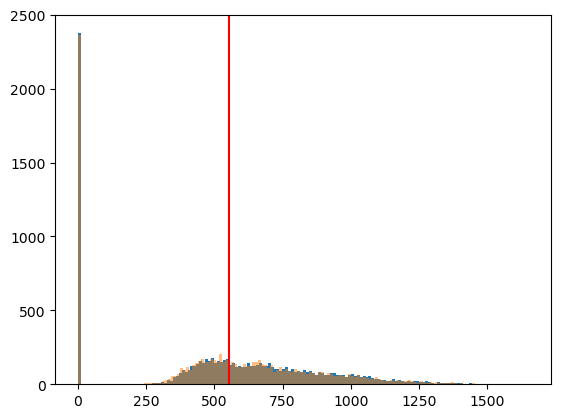

In [342]:
import matplotlib.pyplot as plt
plt.hist(pred,bins=150,alpha=1)
tp = pd.read_csv('./lgb-nw.csv')['Income']
for i in test[(test['Age'] < 15)].index:
    tp[i] = 0
for i in test[(test['Employment_Status'] == 'Not Working')].index:
    tp[i] = 0
for i in test[(test['Industry_Status'] == 'Not in universe or children')].index:
    tp[i] = 0
for i in range(len(pred)):
    if tp[i] < 200:
        tp[i] = 0
#     elif tp[i] > 0 and tp[i] < 200:
#         tp[i] = 200
plt.hist(tp,bins=150,alpha=0.5)
# plt.hist(train['Income'],bins=50)
plt.ylim(0,2500)
plt.vlines(train['Income'].mean(),0,3000,color='red')

In [343]:
train = pd.read_csv('./open/train.csv')
print(train[(train['Income'] > 0) & (train['Income'] < 3000)]['Income'].mean())
print(np.mean([i for i in pred if i > 0]))

937.9085463972823
703.2318713550103


In [344]:
sub = pd.read_csv('./open/sample_submission.csv', index_col=0)
sub['Income'] = pred
sub.to_csv('./lgb.csv')

In [348]:
# 앙상블해봐바 -> 534.2787
# target 인코딩해봐바